In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# EDA

In [5]:
amsterdam = pd.read_csv("../data/clean/amsterdam.csv")
athens = pd.read_csv("../data/clean/athens.csv")
barcelona = pd.read_csv("../data/clean/barcelona.csv")
berlin = pd.read_csv("../data/clean/berlin.csv")
budapest = pd.read_csv("../data/clean/budapest.csv")
lisbon = pd.read_csv("../data/clean/lisbon.csv")
london = pd.read_csv("../data/clean/london.csv")
paris = pd.read_csv("../data/clean/paris.csv")
rome = pd.read_csv("../data/clean/rome.csv")
vienna = pd.read_csv("../data/clean/vienna.csv")
airbnb = pd.read_csv("../data/clean/airbnb_merged.csv")

## Univariate

In [6]:
numerical_columns = airbnb[["realSum" , "cleanliness_rating", "guest_satisfaction_overall", 
                            "dist", "metro_dist", "attr_index", "rest_index"]]

normalizer = MinMaxScaler()
num_norm = normalizer.fit_transform(numerical_columns)
df_norm = pd.DataFrame(num_norm, columns=numerical_columns.columns, index=airbnb.index)
df_norm

,realSum,cleanliness_rating,guest_satisfaction_overall,dist,metro_dist,attr_index,rest_index
0,0.008603,1.000,0.9125,0.198180,0.177775,0.014125,0.011784
1,0.016718,0.750,0.8125,0.018732,0.016614,0.136943,0.122473
2,0.012389,0.875,0.8375,0.226885,0.255711,0.013366,0.011355
3,0.021542,0.875,0.8750,0.014635,0.030661,0.106286,0.128128
4,0.024352,1.000,0.9750,0.020962,0.022170,0.119526,0.119182
...,...,...,...,...,...,...,...
51702,0.036798,1.000,1.0000,0.020386,0.009330,0.045405,0.062784
51703,0.014587,0.750,0.8250,0.031467,0.006905,0.042197,0.048319
51704,0.032543,1.000,0.9125,0.038743,0.014031,0.034217,0.039349
51705,0.014385,1.000,0.8375,0.119870,0.019980,0.020915,0.020817


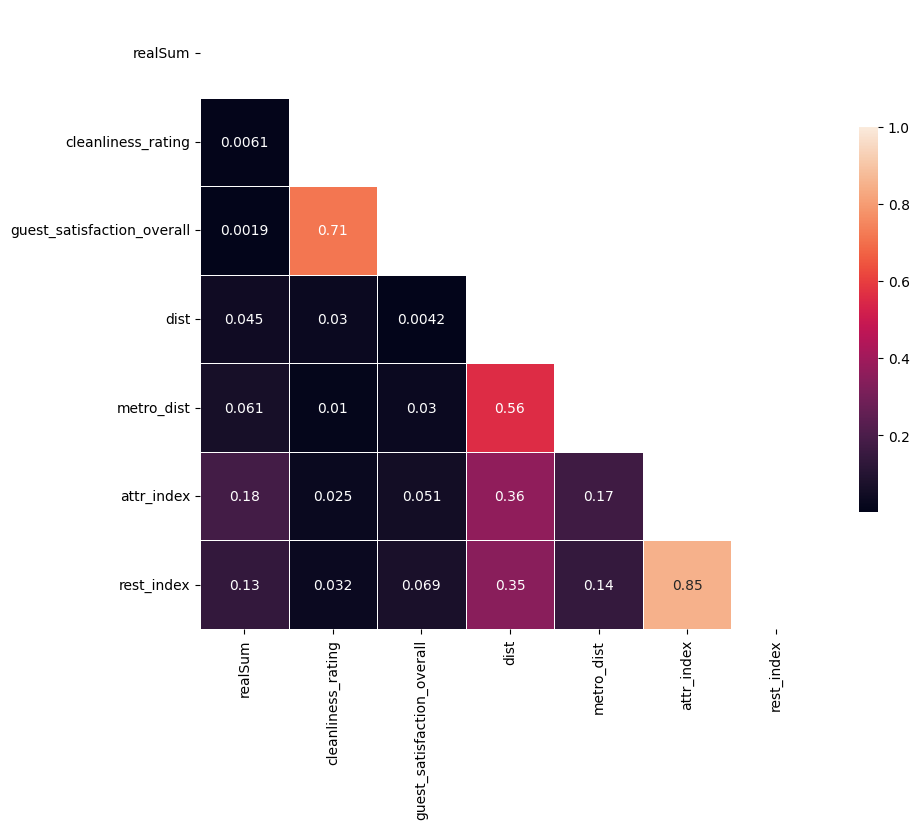

In [7]:
corr=np.abs(df_norm.corr()) 

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

# Factors (weekend, city, services...) that affect client satisfaction 

# Factors (weekend, city, services...) that affect prices 